# SWAP RATE #  

Description:  converts nominal survey data into a numerical values based on a dictionary lookup.  It allows the user to switch nominal scale data from text to values for statistical functions and plotting.  It can also be used to RECODE text values to differnt numeric values

**Notes:**

- Assumes TEXT will have a numeric equivalent in the supplied DICT; else it will throw an unhandled exception 
- Assumes that "rateDict" is a "default" ratings dictionary that exists in memory.
- Required:  source_nom_data; the array of TEXT data you intend to convert e.g. df.[columnNameWithText]
- Optional:  listname:  the dictionary that maps the text to it's respective values; currently defaluts to RateBackDict which was used as the 5 point Likert-like scale for satisfaction.
- OUTPUT is a list that is in memory; you are on your own to assign it to a var e.g. foo=rateback(nom,dict)



In [44]:
# Baggage
#
import numpy as np 
import pandas as pd
import os
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Demo Data
#
df=pd.read_csv("C:\\Users\grhod\OneDrive\$GOR\Documents\loopDemo.csv")
rateDict = {"Extremely Satisfied":5,"Satisfied":4,"Neither satisfied nor dissatisfied":3,"Dissatisfied":2,"Extremely dissatisfied":1}
rateDictBAK = {"Extremely Satisfied":1,"Satisfied":2,"Neither satisfied nor dissatisfied":3,"Dissatisfied":4,"Extremely dissatisfied":5}
rateDict9 = {"Extremely Satisfied":9,"Satisfied":9,"Neither satisfied nor dissatisfied":9,"Dissatisfied":9,"Extremely dissatisfied":9}    


## Main use case:  convert text to values ##  

Imagine you have a data set with text values that coorespond to numeric values like this one
But you can't summerize or run statisitics on text data like what's shown in "SAT_Rating"

In [56]:
# Rename cols for ease of use
# inspect the data frame

df.columns = ["ID","Group_Name","SAT_Rating"]
df

,ID,Group_Name,SAT_Rating
0,1,Male,Extremely Satisfied
1,2,Female,Satisfied
2,3,Male,Neither satisfied nor dissatisfied
3,4,Male,Dissatisfied
4,5,Male,Extremely dissatisfied
...,...,...,...
195,196,Female,Neither satisfied nor dissatisfied
196,197,Female,Neither satisfied nor dissatisfied
197,198,Female,Neither satisfied nor dissatisfied
198,199,Female,Neither satisfied nor dissatisfied


In [55]:
#  Here's an example of what you might want to do (create a boxplot)
#  but youc can't because the data is not numeric.
#
testPlot = sns.boxplot(data=df, x=df.Group_Name, y=df.SAT_Rating)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [48]:
# This function will help with that issue by providing a dictionary lookup to convert text to numeric values.

# SWAP_RATE:  converts text survey data into a numerical value based on a dictionary lookup
# Allows the user to switch nominal scale data from text to values for statistical functions and plotting.
# Can also be used to RECODE text values to differnt numeric values
# 
def swap_rate (source_nom_data, listname=rateDict):  # source_nom is the text array, listname is the reference dict
    newList=list()  # creates an empty, temporary list for the function
    for nomRating in source_nom_data:  # nomrating is the term use for the source text that will be converted
       newList.append(listname[nomRating])  # handles the lookup and appends it to the temporary list
    return newList
    print(newList) # if not coverted to a variable, the function should print the list to stdout

# Assumes TEXT will have a numeric equivalent in the supplied DICT; else it will throw an unhandled exception 
# Assumes that the dictionary provided IS the right shchema for your levels of measurement.
# Assumes that "rateDict" is a "default" ratings dictionary that exists in memory.
# Required:  source_nom_data; the array of TEXT data you intend to convert e.g. df.[columnNameWithText]
# Optional:  listname:  the dictionary that maps the text to it's respective values; currently defaluts to RateBackDict
# which was used as the 5 point Likert-like scale for satisfaction.
# OUTPUT is a list that is in memory; you are on your own to assign it to a var e.g. foo=rateback(nom,dict)
        


In [49]:
# Using "swap_rate," lookup the values using the default dict and store them in a new list called "rateValues"  
# Covert list to data frame 
# inspect data frame 
#
rateValues = swap_rate(df.SAT_Rating)
df2 = pd.DataFrame(rateValues,columns=["Rate_Values"])
df2


,Rate_Values
0,5
1,4
2,3
3,2
4,1
...,...
195,3
196,3
197,3
198,3


In [50]:
# Join the two data frames so you can compare the values to the text side by side...
# inspect the new data frame with 
df2 = pd.concat([df, df2],axis=1)
df2

,ID,Group_Name,SAT_Rating,Rate_Values
0,1,Male,Extremely Satisfied,5
1,2,Female,Satisfied,4
2,3,Male,Neither satisfied nor dissatisfied,3
3,4,Male,Dissatisfied,2
4,5,Male,Extremely dissatisfied,1
...,...,...,...,...
195,196,Female,Neither satisfied nor dissatisfied,3
196,197,Female,Neither satisfied nor dissatisfied,3
197,198,Female,Neither satisfied nor dissatisfied,3
198,199,Female,Neither satisfied nor dissatisfied,3


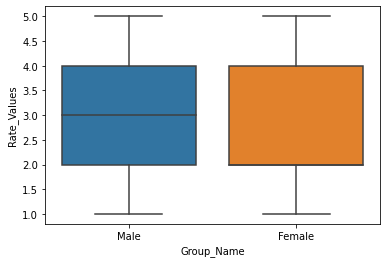

In [51]:
## Attempt the same plot AGAIN - but using the updated data frame with numeric values
#
testPlot1 = sns.boxplot(data=df2, x=df2.Group_Name, y=df2.Rate_Values)

## Secondary Use Cae:  recoding data ##

Imagine you need to recode or weight values differently?   
The same function could use a different dictionary to recode the list.  

In [52]:
# Exercise function with the alternate dictionary
# Add list data to a new data frame
# Inspect the data frame

recodeBAK_Values = swap_rate(df.SAT_Rating, rateDictBAK) # note the alt dictionary "rateDictBAK" = uses all 9s for testing
df3 = pd.DataFrame(recodeBAK_Values,columns=["RecodeBAK_Values"])
df3

,RecodeBAK_Values
0,1
1,2
2,3
3,4
4,5
...,...
195,3
196,3
197,3
198,3


In [53]:
# Final Join shows the Rate values with the recoded values side by side

df4 = pd.concat([df2, df3],axis=1)
df4

,ID,Group_Name,SAT_Rating,Rate_Values,RecodeBAK_Values
0,1,Male,Extremely Satisfied,5,1
1,2,Female,Satisfied,4,2
2,3,Male,Neither satisfied nor dissatisfied,3,3
3,4,Male,Dissatisfied,2,4
4,5,Male,Extremely dissatisfied,1,5
...,...,...,...,...,...
195,196,Female,Neither satisfied nor dissatisfied,3,3
196,197,Female,Neither satisfied nor dissatisfied,3,3
197,198,Female,Neither satisfied nor dissatisfied,3,3
198,199,Female,Neither satisfied nor dissatisfied,3,3


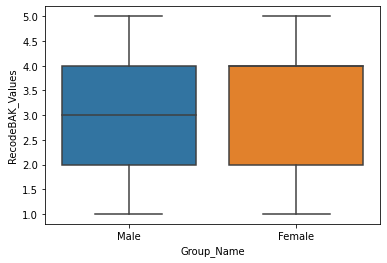

In [54]:
testPlot2 = sns.boxplot(data=df4, x=df4.Group_Name, y=df4.RecodeBAK_Values)